In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv('/content/Credit Card Customer Data.csv')
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [13]:
df.info() # It gives the info about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [15]:
df.shape # 660 rows and 7 cols

(660, 7)

In [16]:
df.size #total no of elements in df

4620

In [18]:
#divide the data into input
x = df.iloc[:,3:7].values
x

array([[ 2,  1,  1,  0],
       [ 3,  0, 10,  9],
       [ 7,  1,  3,  4],
       ...,
       [ 8,  1,  9,  1],
       [10,  1, 15,  0],
       [ 9,  0, 12,  2]])

In [19]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [35]:
#Here our main task is to find out the number of clusters(k)
import numpy as np
np.sqrt(660) #660 is the total no of points/rows
#No of Cluster - k
#k value should not exceed the square root of total no of points/rows
#Hence k value should be in the range of 2 to 25

25.69046515733026

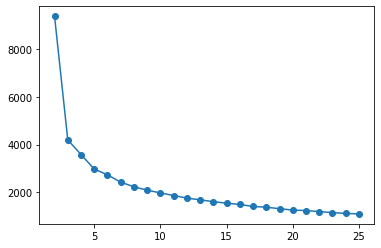

In [37]:
from sklearn.cluster import KMeans
k = range(2,26)#2 is inclusive and 26 is exclusive

sse = [] #empty list

#for i in range(2,26):
for i in k:
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  sse.append(model_demo.inertia_)#.inertia - calculates the sum of squared error
plt.scatter(k,sse)
plt.plot(k,sse)

2 Clusters , Score = 0.46883320693191005
3 Clusters , Score = 0.5531009568914348
4 Clusters , Score = 0.3538689665346918
5 Clusters , Score = 0.3068888239286926
6 Clusters , Score = 0.287761503097955
7 Clusters , Score = 0.27722596672877253
8 Clusters , Score = 0.27702178068310146
9 Clusters , Score = 0.2585114399466726
10 Clusters , Score = 0.2550269678063456
11 Clusters , Score = 0.26118880639126035
12 Clusters , Score = 0.25117788064520963
13 Clusters , Score = 0.247008930701051
14 Clusters , Score = 0.25598063225512524
15 Clusters , Score = 0.24856267935505041
16 Clusters , Score = 0.24249989281434906
17 Clusters , Score = 0.24400583943699322
18 Clusters , Score = 0.24889013681551508
19 Clusters , Score = 0.2533935525172875
20 Clusters , Score = 0.25757475867429175
21 Clusters , Score = 0.25412369881386615
22 Clusters , Score = 0.25949801991986704
23 Clusters , Score = 0.2590819738135681
24 Clusters , Score = 0.2577525696239544
25 Clusters , Score = 0.25143896159736345


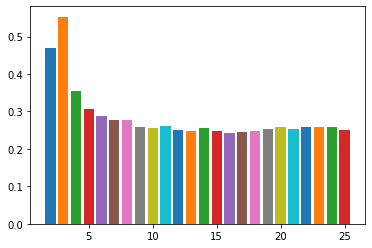

In [38]:
#2.SILHOUETTE SCORE METHOD
from sklearn.metrics import silhouette_score
k = range(2,26)
for i in k:
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  y_pred = model_demo.predict(x)
  print(f'{i} Clusters , Score = {silhouette_score(x,y_pred)}')
  plt.bar(i,silhouette_score(x,y_pred))


In [41]:
#APPLY CLUSTERER
k=7
from sklearn.cluster import KMeans
model = KMeans(n_clusters = k,random_state = 0)
model.fit(x)

KMeans(n_clusters=7, random_state=0)

In [42]:
y = model.predict(x) #Predicted output values
y

array([6, 3, 1, 1, 2, 3, 4, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0,
       0, 3, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 3, 3, 1, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0,
       3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0,
       0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0,
       0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3,
       3, 0, 3, 3, 3, 0, 3, 3, 6, 1, 5, 1, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5,
       1, 6, 1, 6, 6, 1, 6, 6, 1, 1, 5, 1, 6, 5, 1, 5, 6, 5, 6, 1, 6, 6,
       5, 6, 6, 6, 6, 5, 6, 1, 1, 6, 5, 1, 6, 5, 5, 6, 5, 6, 6, 6, 1, 5,
       6, 6, 1, 5, 6, 1, 1, 6, 5, 5, 5, 6, 5, 5, 6,

In [43]:
y.size

660

In [44]:
x[y == 1,1]
#the first '1' is the cluster no 1 and the second '1' is the column index 1
#the value of input , when cluster 1 is selected and column with index 1 is selected

array([1, 1, 0, 1, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2,
       3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3,
       3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2,
       3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3,
       2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3])

In [45]:
np.unique(y,return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([133, 125,  22,  88,  28, 109, 155]))

In [46]:
133+125+22+88+28+109+155

660

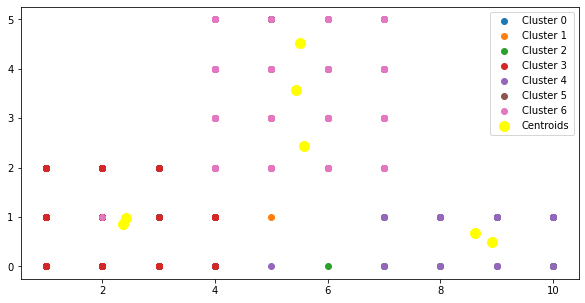

In [47]:
#FINAL VISUALISATION
plt.figure(figsize = (10,5))
for i in range(k): # i iterates from 0 to 6
  plt.scatter(x[y == i,0],x[y == i,1],label = f'Cluster {i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 100,c = 'yellow',label = 'Centroids')
plt.legend()